# Finding The Best Markets to Advertise An E-learning Product

<font color= 'red'> Goal </font>: The goal of this project is to find the two best market domains to advertise our products.
We work for an e-learning company that offers courses on programming. Most of our courses are on web and mobile development although we also cover may other domains , like data science, game development, et al

# Understanding the Data

To reach our goal, we could have organized surveys for a couple of different markets to find out which would be the best choices for advertising. This is very costly , however, and it's a good call to explore cheaper options first.

Another option woould be to search existing data that might be relevant for our purpose. For this analysis, we choose data from [freeCodeCamp's 2017 New Coder Survey](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/).

[freeCodeCamp](https://www.freecodecamp.org/) is a free e-learning platform that offers courses on web development. Because they run [a popular Medium publication](https://www.freecodecamp.org/news/) (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis. 

The survey data is publicly available in [this GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey)

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

In [2]:
link = 'https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv'

survey_2017 = pd.read_csv(link, low_memory=0) # low_memory= False to silence dtypes warning


In [3]:
survey_2017.shape

(18175, 136)

In [4]:
pd.options.display.max_columns = 140 # to avoid truncation 

In [5]:
survey_2017.head()


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

## Checking for Sample Representativity

As we mentioned earlier, most of the courses we offer are on web and mobile development, but we also cover many other domains, like data science et al. For the purpose of our analysis, we want to answer questions about a *population* of new coders that are interested in the subjects we teach.

We'd like to know:

1. Where are these new coders located
2. What are the locations with the greatest number of new coders
3. How much money new coders are willing to spend on learning.

the **JobRoleInterest** column describes for every participant the role(s) they'd be interested in working - we'll use this column to evaluate whether the sample is representative for our population of interest

In [6]:
survey_2017.JobRoleInterest.value_counts(normalize=True)* 100

Full-Stack Web Developer                                                                                                                                                                                                               11.770595
  Front-End Web Developer                                                                                                                                                                                                               6.435927
  Data Scientist                                                                                                                                                                                                                        2.173913
Back-End Web Developer                                                                                                                                                                                                                  2.030892
  Mobile Developer                  

- A significant number of participants are interested in web development (becoming a Full-Stack Web Developer, Front-End Web Developer, and the likes)

- Some `new coders` are also interested in mobile development

- some `new coders` are interested in other roles other than web and mobile development 

It also interesting to note that many newcoders are interested in more than one subject. We'd like to know how many are interested in one subject or more than one subjects.

As a result, we'll be splitting the JobRoleInterest column and generating a relative frequency table to show the percentage of respondents per number of subjects they're interested in.

In [7]:
#check if there are Nan values in the JobRoleInterest column

survey_2017.JobRoleInterest.notna().sum()

6992

we will drop rows with null values as they don't contain useful information for the purpose of our anaylsis.

In [8]:
# drop all Nan values since we can't split a Nan value.

interest_not_null = survey_2017['JobRoleInterest'].dropna()

In [9]:
# check the number of `new coder` by the number of JobRoleInterest

splitted_interest = interest_not_null.str.split(',')

# counting the number of interest

no_of_option = splitted_interest.apply(lambda x: len(x))

freq_option = no_of_option.value_counts(normalize=True)*100

freq_option.sort_index()

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

It appears most `new coders` are interested in one Role only. However a sizeable number are interested in more than one Role..

In [10]:
%matplotlib inline
import seaborn as sns
import re

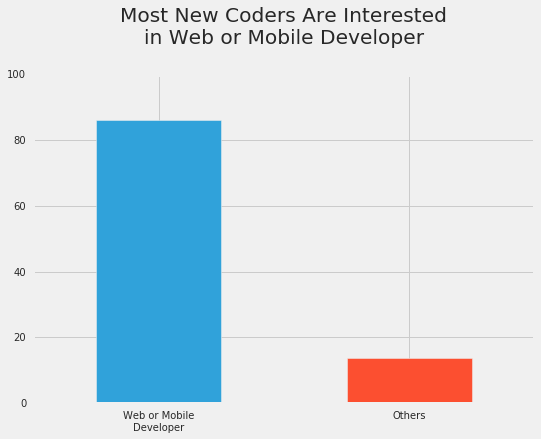

In [11]:
contain_mobile_web = interest_not_null.str.contains(r'Web Developer|Mobile developer', flags = re.I)

freq_mobile_web = contain_mobile_web.value_counts(normalize=True)*100

plt.style.use('fivethirtyeight')

freq_mobile_web.plot.bar(ylim=[0,100])

plt.xticks([0,1], ['Web or Mobile\nDeveloper', 'Others'],rotation=0)
# plt.ylim([0,100]) option to insertingn ylim parameter in series.plot.bar
plt.title('Most New Coders Are Interested\nin Web or Mobile Developer', y =1.08) # y value is to pad the title up


Majority (above 80%) of `new coders` show interest in Web or Mobile Development. 
We are interested in advertising to people interested in all kind of programming niches but particularly web development and mobile development.

We need to find out the best market to invest money in for advertising our courses. We want to know;

* where are this  `new coders` located.
* Which location had the largest number of `new coders`
* How much money are `new coders` willing to spend on learning


## New Coders- Locations and Densities

The data set provides information about the location of each participant at a country level. 

For our analysis, we'll work with the `ContryLive` variable because we're interested in where people actually live at the moment when we run the ads. 

Because the data set provides information at a country level, we can think of each country as an individual market . This means we can frame our goal as finding the two best countries to advertise in.

One indicator of a good market is the number of potential customers - the more potential customers in a market , the better.

In [12]:
# we will drop all rows were participants didn't answere what role they are
# interested in. Where a participant didn't respond, we can't know for sure what
# their interests are, so it's better if we leave out this category of participants

role_indicated = survey_2017[
    survey_2017['JobRoleInterest'].notnull()].copy()

absolute_frequency = role_indicated['CountryLive'].value_counts()

relative_frequency = role_indicated['CountryLive'].value_counts(normalize=True
                                                               )*100

location_df = pd.DataFrame({'absolute_frequency':absolute_frequency, 
                           'relative_frequency': relative_frequency})

In [13]:
location_df

,absolute_frequency,relative_frequency
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


The `US` seems to be the most interesting market with 45.7% share of the respondent. `India` comes in second with 7.7% which is not so different from `UK` with 4.6%. `Canada` is not also far off with 3.8%.

It is not enough to stop our analysis here as we have to go more granular to check how much our respondent are willing to spend in each of these market. Advertising in a high density market where most respondents are only willing to learn for free will not be profitable for us.

# Spending Money for Learning

The `MoneyForLearning` column describes in American dollars the amount of money spent by participants from the moment they started coding untils the moments they completed the survey. Our company sells subscriptions at a price of $59 per mont, and for this reason we're interested in finding out how much each student spends per month.

It also seems a good idea to narrow down our analysis to only four countries. Two reasons for this decision are:
- These are the countries having the highest abolute frequencies in our sample, which means we have a decent amount of data for each.
- Our courses are written in English and English is an official language in all these four countries. The more people that know English, the better our chances to target the right people with our ads.

In [14]:
role_indicated['MoneyForLearning'].isnull().sum()

516

In [15]:
# create a function where data points with MonthsProgramming = 0 will
# have the MoneyForLearning divided by 1 instead of zero which will
# result in zeroerrordivision 

def money_per_month(row):
    if row[1] == 0:
        m_per_month = row[0]/1
    else:
        m_per_month = row[0]/row[1]
        
    return m_per_month

role_indicated['MoneyPerMonth'] = role_indicated[
    ['MoneyForLearning','MonthsProgramming']].apply(
    money_per_month,axis=1)

In [16]:
role_indicated.MoneyPerMonth.isnull().sum()

675

In [17]:
#drop rows where `MoneyPerMonth` is Nan

fcc_good = role_indicated[role_indicated.MoneyPerMonth.notna()].copy()

Since we are trying to find the best market i.e countries for our e-learning product, we are also going to drop rows with Null values in the `CountryLive` columns

In [18]:
fcc_good = fcc_good[fcc_good.CountryLive.notna()]

# check to see if we have enough data to proceed
fcc_good.CountryLive.value_counts(dropna=False).head()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Name: CountryLive, dtype: int64

To find out how much money the average respondent spent on learning, we will group `fcc_good` by countries, selecting only the top four countries with the highest market density.

In [19]:
top_4 = (location_df.index.tolist())[:4]

avg_spent = fcc_good.pivot_table(index='CountryLive',
                     values=['MoneyPerMonth'],
                                 aggfunc=[np.mean]
                                ).loc[list(location_df.index)[:4]]

avg_spent.columns = ['mean']

avg_spent

,mean
CountryLive,
United States of America,227.997996
India,135.100982
United Kingdom,45.534443
Canada,113.510961


`US` appears to have the highest money spent per Month on learning. `India` having a higher money spent per Month on learning relative to `United Kingdom` and `Canada` is quite surprising taking into consideration social-economic parameters like [GDP per Capital](https://www.worldometers.info/gdp/gdp-by-country/)

It might be that we don't have enough representative data for United Kingdom,Canada and India or there are outliers(maybe coming from wrong survey answers) making the mean of India appear bigger or lowering the mean of United Kingdom and Canada or it might be that the results are correct.

Let's explore this further.

# Dealing with Extreme Outlier

We will generate boxplots to visualize the distribution of how much money is spent by each participant per month in each of these top four countries.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



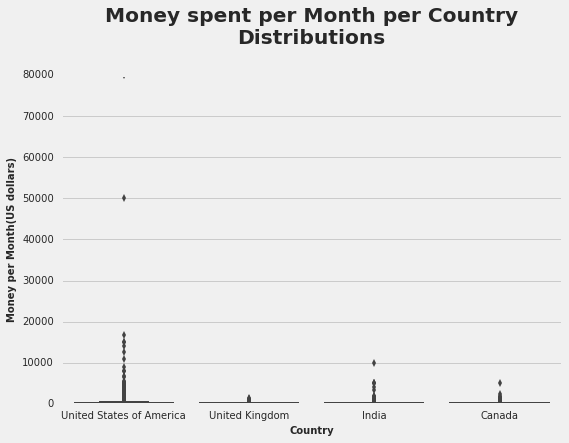

In [20]:
fcc_good_4 = fcc_good[fcc_good.CountryLive.isin(top_4)].copy()

def money_distro(df):
    sns.boxplot(data= df, x='CountryLive',y='MoneyPerMonth')
    plt.title('Money spent per Month per Country\nDistributions',
          fontweight='bold', y=1.08)
    plt.ylabel('Money per Month(US dollars)', fontsize=10,
               fontweight='bold')
    
    plt.xlabel('Country',fontsize=10,fontweight='bold')
    
    plt.show()
    
money_distro(fcc_good_4)

It is had to see from the plot if there is anything wrong with the India, Uk and Canada market at a glance. However, the `US` market contains a money spent per month outlier of 50000 dollars. This seems very unlikely. We will remove moneyperMonth greater than 20,000 dollars and recompute the mean

In [21]:
# recompute the mean for Countries where MoneyPerMonth < 20000b

fcc_good = fcc_good[fcc_good.MoneyPerMonth < 20000]

less_20k_t_4 = fcc_good.pivot_table(index='CountryLive',
                               values='MoneyPerMonth').loc[top_4]

less_20k_t_4


,MoneyPerMonth
CountryLive,
United States of America,183.800110
India,135.100982
United Kingdom,45.534443
Canada,113.510961


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



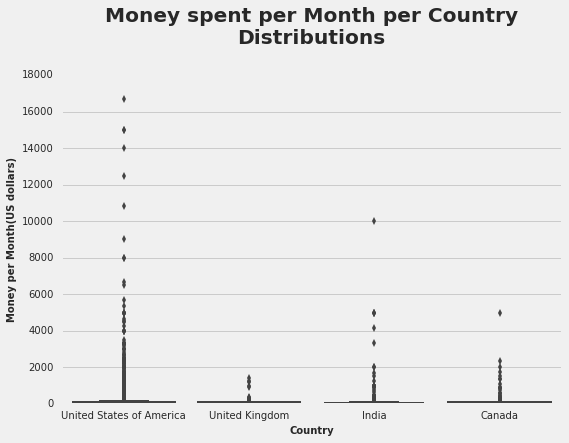

In [22]:
# isolate the top 4 countries of interest and plot the MoneyPerMonth distribution boxplot
only_4 = fcc_good[fcc_good.CountryLive.isin(top_4)]

money_distro(only_4)

We can see extreme outlier for India ( with values over 2500 dollars). We are not sure maybe this is good or bad data. It may be that this respondents attended some bootcamp which was quite expensive. This will be explored further.

In [23]:
india_outliers = only_4[
    (only_4.CountryLive == 'India') & (only_4.MoneyPerMonth >= 2500)]

india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Information Security, Full-Stack Web Developer...",no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,

We can see that none of the partcipants from India with MoneyPerMonth greater than or equal to $2500 actually attended any BootCamp.
Overall it is difficult to see from the data if these participants actually this much money on Learning.

Furthermore, the actual question of the survey was "Aside from university tuition, about how much have you spent learning to code so far (in US dollars)", so it is possible they misunderstood this question, thinking tuition fees is included. It is safer to remove these rows. 

In [24]:
# remove outliers for India

only_4 = only_4.drop(india_outliers.index)

looking back, we'll notice extreme outliers for the US market as well with respondents spending over $6000 on MoneyPerMonth. This will be explored further

In [25]:
us_outlier = only_4[
    (only_4.CountryLive == 'United States of America') & 
    (only_4.MoneyPerMonth >= 6000)]
us_outlier

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,architecture or physical engineering,NaN,Employed for wages,NaN,50000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,35.0,796ae14c2acdee36eebc250a252abdaf,d9e44d73057fa5d322a071adc744bf07,44500.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a startup,1.0,"User Experience Designer, Full-Stack Web Dev...",in an office with other developers,English,"single, never married",8000.0,1.0,50dab3f716,2017-03-09 21:26:35,2017-03-09 21:21:58,2017-03-09 21:29:10,2017-03-09 21:26:39,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Architecture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,50000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,50.0,bfabebb4293ac002d26a1397d00c7443,590f0be70e80f1daf5a23eb7f4a72a3d,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a nonprofit,1.0,"Front-End Web Developer, Mobile Developer,...",in an office with other developers,English,"single, never married",13000.0,2.0,e512c4bdd0,2017-03-10 02:14:11,2017-03-10 02:10:07,2017-03-10 02:15:32,2017-03-10 02:14:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

of the 11 extreme outliers for **US** , 6 participants attended bootcamps. We can't figure out where the remaining 5 participants spent these extreme amounts for learning, thus we will remove us outliers who haven't attended any bootcamp.

Additionally, the data shows that 8 of the respondents have been programming for 3months or less when they completed the survey. They most likely paid for a bootcamp that will last several months, so the amount of money spent is unrealistic and should be significantly lower( because they probably didn't spend anything for the next couple of months after the survey). As a result, we'll remove these 8 outliers

In [26]:
# remove us outliers who attended no bootcamp
no_bootcamp = only_4[
    (only_4.CountryLive == 'United States of America') & 
(only_4.AttendedBootcamp == 0) & (only_4.MoneyPerMonth >= 6000)]

only_4 = only_4.drop(no_bootcamp.index)

# remove us outliers who have been programming for 3months or less

less_than_3 = only_4[
    (only_4.CountryLive == 'United States of America') & 
    (only_4.MonthsProgramming <= 3) & (only_4.MoneyPerMonth >= 6000)]

only_4 = only_4.drop(less_than_3.index)

looking at the last boxplot,we see an extreme outlier for Canada where the respondent spent more than $5000 per month on learning. Let's explore this respondent further

In [27]:
canada_outlier = only_4[(only_4.CountryLive == 'Canada') & 
                        (only_4.MoneyPerMonth > 4500)]

canada_outlier

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30 to 44 minutes,Canada,Canada,finance,NaN,Employed for wages,NaN,60000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,250000.0,10.0,739b584aef0541450c1f713b82025181,28381a455ab25cc2a118d78af44d8749,140000.0,1.0,1.0,0.0,0.0,I haven't decided,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,work for a multinational corporation,NaN,"Mobile Developer, Full-Stack Web Developer, ...",from home,Yue (Cantonese) Chinese,"single, never married",10000.0,2.0,41c26f2932,2017-03-25 23:23:03,2017-03-25 23:20:33,2017-03-25 23:24:34,2017-03-25 23:23:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


Again we see thesame issue with this respondent as with the respondent from US who attended bootcamp but had only been programming for no more than 2 months. This respondent seem to have paid for  a large sum at the beginning of a bootcamp and probably didn't spend any more money some couple of months after the survey. We will drop this participant as well

In [28]:
less_than_2 = only_4[(only_4.CountryLive == 'Canada') &
                    (only_4.MonthsProgramming <= 2) &
                    (only_4.MoneyPerMonth > 4500)]

only_4 = only_4.drop(less_than_2.index)

Let's recompute the mean and generate the final boxplot

In [29]:
final_avg_spent = only_4.pivot_table(index='CountryLive',
                                    values='MoneyPerMonth')
final_avg_spent.reset_index(inplace=True)
final_avg_spent

,CountryLive,MoneyPerMonth
0,Canada,93.065400
1,India,65.758763
2,United Kingdom,45.534443
3,United States of America,142.654608


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



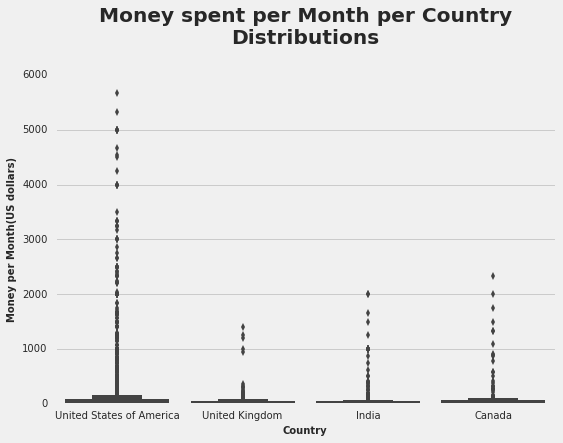

In [30]:
# generate the distribution of moneypermonth for each participant in the top
# four countries

money_distro(only_4)

# Choosing the Two Best Markets

Considering the final averages for each of the four markets, we should definitely advertise in the US market as lots of new coders live there and pay a good amount of money - \$142

Another market we may consider given the average is the Canadian market - given that we sell our subscriptions for \$59 and new coders in Canada on average pay around \$93 compared to new coders in India (\$65) and Uk ($45).

However before we conclude on making Canada the second option, let's explore the market share of these new coders within the top four countries

In [31]:
only_4.CountryLive.value_counts(
    dropna=False, normalize=True)*100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

We can see that although the average new coder in India pays less than new Coder in Canada (\$65 vs \$93), India has almost twice as much new coders as Canada.

One thing we could do is split the money for advertisement in proportion to market share of these top three countries.

We could:

1. Advertise in the 3 markets in the proportion below:
  - spend 60% of the advertisement funds on the US market, 25% on the India market and 15% on the Canadian market
  - or spend 50% on the US market, 30% on the Indian and 20% on the Canadian market
  
2. Advertise in only 2 markets proportionally as below:
  - Spend 70% of advertisement fund on the US market and 30% on the Indian market
  - spend 65% of advertisement fund on the US market and 35% on the Indian market
  
3. Advertise only in the US market.

At this point we it could also be better to send over our analysis to the marketing team and let them use their domain knowledge to take the best decision. Probably they could conduct survey for both the Indian and Canadian market and get back to us with the survey data for analysis.

# Conclusion

In this project, we analyzed the survey data from new coders to determine the two best market to advertise in. The only solid conclusion we arrived at is that the US market is a good market to advertise in.

For the second market, it wasn't clear-cut which market between Canada and India to advertise in. So we sent the result of analysis to the marketing team to use their domain knowledge to make the best decision.